1) Я решила работать с данными **Минкультуры РФ**. Выбрала данные, с которыми буду работать: [Реестр прокатных удостоверений фильмов](https://opendata.mkrf.ru/item/api). Данные большие по объему, поэтому я не буду их скачивать, а соберу их через API.
2) Я запросила ключ API на портале открытых данных Минкультуры РФ и получила его.

In [1]:
key = 'daee29136a77498518058c2bba0d556982981cfff5449301089f91117aae3de4' 
url = 'https://opendata.mkrf.ru/v2/register_movies?apikey=' # url берем на сайте Минкультуры РФ
url + key

'https://opendata.mkrf.ru/v2/register_movies?apikey=daee29136a77498518058c2bba0d556982981cfff5449301089f91117aae3de4'

In [2]:
pip install flatten_json

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd #импортирую все нужные библиотеки
import json
import requests
from flatten_json import flatten

3) Получаю данные в json формате (в спецификации API я нашла пример оформления запроса и сделала согласно нему).
Параметры, которые я задала: удостоверения фильмов *России, США и стран Европы, произведенных в 2024 году с возрастным ограничением 16+*.

In [5]:
response = requests.get(
url='https://opendata.mkrf.ru/v2/register_movies/$',
headers={'Accept': 'application/json','X-API-KEY': 'daee29136a77498518058c2bba0d556982981cfff5449301089f91117aae3de4'},
params={'f': '{"data.general.countryOfProduction": {"$in":["Россия", "США", "Испания", "Италия", "Франция"]}, "data.general.crYearOfProduction": {"$search":"2024"}, "data.general.ageLimit":{"$search":"16"}}','l': 1000}
) # параметры нашла в спецификации API на сайте Минкультуры
print(response.json() if response.status_code == 200 and response.text.strip() else "status code not 200")

my_data = response.json()


{'status': 200, 'nextPage': 'https://opendata.mkrf.ru/v2/register_movies/$?f=%7B%22data.general.countryOfProduction%22%3A%20%7B%22%24in%22%3A%5B%22%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%22%2C%20%22%D0%A1%D0%A8%D0%90%22%2C%20%22%D0%98%D1%81%D0%BF%D0%B0%D0%BD%D0%B8%D1%8F%22%2C%20%22%D0%98%D1%82%D0%B0%D0%BB%D0%B8%D1%8F%22%2C%20%22%D0%A4%D1%80%D0%B0%D0%BD%D1%86%D0%B8%D1%8F%22%5D%7D%2C%20%22data.general.crYearOfProduction%22%3A%20%7B%22%24search%22%3A%222024%22%7D%2C%20%22data.general.ageLimit%22%3A%7B%22%24search%22%3A%2216%22%7D%7D&l=1000&cursor=AoE%2FATY2OTkyZjcxNzhkNzg0MGJkMTkzZDhlZSE5OTkzODI0', 'cursor': 'AoE/ATY2OTkyZjcxNzhkNzg0MGJkMTkzZDhlZSE5OTkzODI0', 'total': 576, 'filter': {'$and': [{'data.general.countryOfProduction': {'$in': ['Россия', 'США', 'Испания', 'Италия', 'Франция']}}, {'data.general.crYearOfProduction': {'$search': '2024'}}, {'data.general.ageLimit': {'$search': '16'}}, {'odSetVersions': {'$in': ['66992f7178d7840bd193d8ee']}}]}, 'o': False, 's': 0, 'l': 1000, 'data': [{'

4) Преобразую json формат в датафрейм:

In [6]:
my_data

{'status': 200,
 'nextPage': 'https://opendata.mkrf.ru/v2/register_movies/$?f=%7B%22data.general.countryOfProduction%22%3A%20%7B%22%24in%22%3A%5B%22%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%22%2C%20%22%D0%A1%D0%A8%D0%90%22%2C%20%22%D0%98%D1%81%D0%BF%D0%B0%D0%BD%D0%B8%D1%8F%22%2C%20%22%D0%98%D1%82%D0%B0%D0%BB%D0%B8%D1%8F%22%2C%20%22%D0%A4%D1%80%D0%B0%D0%BD%D1%86%D0%B8%D1%8F%22%5D%7D%2C%20%22data.general.crYearOfProduction%22%3A%20%7B%22%24search%22%3A%222024%22%7D%2C%20%22data.general.ageLimit%22%3A%7B%22%24search%22%3A%2216%22%7D%7D&l=1000&cursor=AoE%2FATY2OTkyZjcxNzhkNzg0MGJkMTkzZDhlZSE5OTkzODI0',
 'cursor': 'AoE/ATY2OTkyZjcxNzhkNzg0MGJkMTkzZDhlZSE5OTkzODI0',
 'total': 576,
 'filter': {'$and': [{'data.general.countryOfProduction': {'$in': ['Россия',
      'США',
      'Испания',
      'Италия',
      'Франция']}},
   {'data.general.crYearOfProduction': {'$search': '2024'}},
   {'data.general.ageLimit': {'$search': '16'}},
   {'odSetVersions': {'$in': ['66992f7178d7840bd193d8ee']}}]},
 'o':

In [7]:
records = []
for item in my_data['data']:
    record = {
        'filmname': item['data']['general']['filmname'], # сразу создаю словарь только с теми параметрами, которые мне нужны, чтобы потом преобразовать их в колонки
        'cardNumber': item['data']['general'].get('cardNumber', ''),
        'cardDate': item['data']['general'].get('cardDate', ''),
        'crYearOfProduction': item['data']['general']['crYearOfProduction'],
        'countryOfProduction': item['data']['general']['countryOfProduction'],
        'director': item['data']['general']['director'],
        'cameraman': item['data']['general'].get('cameraman', ''), 
        'scriptAuthor': item['data']['general'].get('scriptAuthor', ''),
        'producer': item['data']['general'].get('producer', ''),
        'durationMinute': item['data']['general']['durationMinute'],
        'studio': item['data']['general'].get('studio', ''),
        'ageCategory': item['data']['general']['ageCategory'],
        'ageLimit': item['data']['general'].get('ageLimit', ''),
        'annotation': item['data']['general'].get('annotation', ''), # использовала метод .get() по ключам, в которых выдавал ошибку (скорее всего, отсутствовали некоторые значения)
        'color': item['data']['general']['color'],
        'viewMovie': item['data']['general']['viewMovie'],
        'mediaFormat': item['data']['general'].get('mediaFormat', ''),
        'numberOfSeries': item['data']['general']['numberOfSeries'],
    }
    records.append(record)

df = pd.DataFrame(records) #создала датафрейм
df


filmname cardNumber  \
0    Я тебе перезвоню. Сразу после моей смерти  211005624   
1                               Командир (16+)  111002124   
2            Точка Ноль "режиссёрская версия"   211006824   
3                                    Стиффелио  111003024   
4                                        20/22  211007024   
..                                         ...        ...   
571                                Дикие места  221005425   
572                  Некрасивая подружка 22-23  211011625   
573                                 Про любовь  111008625   
574                           Начнём всё снова  211012325   
575                        Капитан. Летом 1941  111001124   

                     cardDate crYearOfProduction countryOfProduction  \
0    2024-02-09T12:00:00.000Z               2024              Россия   
1    2024-02-09T12:00:00.000Z               2024              Россия   
2    2024-02-19T12:00:00.000Z               2024              Россия   
3    2024-02-19T12:00:00.000Z               2024              Россия   
4    2024-02-20T12:00:00.000Z               2024              Россия   
..                        ...                ...                 ...   
571  2025-03-12T12:00:00.000Z               2024                 США   
572  2025-03-14T12:00:00.000Z               2024              Россия   
573  2025-03-17T12:00:00.000Z               2024              Россия   
574  2025-03-19T12:00:00.000Z               2024              Россия   
575  2024-01-29T12:00:00.000Z               2024              Россия   

                                    director                   cameraman  \
0                                  С. Чупров                   С. Чупров   
1                       А. Гурьянов, Т. Хван               А. Которженко   
2                                 С. Пикалов                   С. Авилов   
3                        Е.Одегова, В.Спирин                   Е.Тимохин   
4                                 А. Симонов                О. Ливинская   
..                                       ...                         ...   
571                                 Джин Шим                    Рэй Хуан   
572                              Н. Углицких  К. Горячев, В. Железнякова   
573  Е. Кондрашина (псевд. Алёна Кондрашина)                А. Перевалов   
574                            Р. Нестеренко                  А. Горулев   
575                               А. Корулин                   Д. Зайцев   

                                          scriptAuthor  \
0                                            С. Чупров   
1                   Т. Хван, Т. Гурьянова, А. Гурьянов   
2                    К. Притула при участие С. Пикалов   
3                                                        
4    А. Симонов, Г. Попова, Р. Есеналиев, А. Рябыше...   
..                                                 ...   
571                                Джефф Янг, Джин Шим   
572            Е. Зверева (псевд. Екатерина Скиданова)   
573            Е. Кондрашина (псевд. Алёна Кондрашина)   
574        Н. Алешина (псевд. Нина Якаб), А. Федоричев   
575                                         А. Корулин   

                                              producer durationMinute  \
0                                            С. Чупров             10   
1                                              Т. Хван             12   
2    Т. Джафаров, И. Оркина-Сексте, А. Дюкарева, Е....             36   
3                                              Н.Буров             52   
4                      А. Кретов, Г. Акопян, С. Першин             20   
..                                                 ...            ...   
571                   Джин Шим, Джефф Янг И Брайан Янг             37   
572                                        В. Михайлов             57   
573            Е. Кондрашина (псевд. Алёна Кондрашина)             27   
574                                        Т. Джафаров              3   
575                        

5) Привожу датафрейм в более удобный формат для дальнейшего анализа

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   filmname             576 non-null    object
 1   cardNumber           576 non-null    object
 2   cardDate             576 non-null    object
 3   crYearOfProduction   576 non-null    object
 4   countryOfProduction  576 non-null    object
 5   director             576 non-null    object
 6   cameraman            576 non-null    object
 7   scriptAuthor         576 non-null    object
 8   producer             576 non-null    object
 9   durationMinute       576 non-null    object
 10  studio               576 non-null    object
 11  ageCategory          576 non-null    object
 12  ageLimit             576 non-null    object
 13  annotation           576 non-null    object
 14  color                576 non-null    object
 15  viewMovie            576 non-null    object
 16  mediaFor

In [ ]:
df1=df.copy()
df1 = df1.drop('crYearOfProduction', axis = 1) #столбцы со значениями, по которым мы отфильтровали данные (год производства и возрастная категория), можно удалить
df1 = df1.drop('ageLimit', axis = 1)
df1 = df1.drop('ageCategory', axis = 1)
df1['durationMinute'] = pd.to_numeric(df1['durationMinute'], errors='coerce')
df1['numberOfSeries'] = pd.to_numeric(df1['numberOfSeries'], errors='coerce')
df1['cardDate'] = pd.to_datetime(df1['cardDate'])

df1

filmname cardNumber  \
0    Я тебе перезвоню. Сразу после моей смерти  211005624   
1                               Командир (16+)  111002124   
2            Точка Ноль "режиссёрская версия"   211006824   
3                                    Стиффелио  111003024   
4                                        20/22  211007024   
..                                         ...        ...   
571                                Дикие места  221005425   
572                  Некрасивая подружка 22-23  211011625   
573                                 Про любовь  111008625   
574                           Начнём всё снова  211012325   
575                        Капитан. Летом 1941  111001124   

                     cardDate countryOfProduction  \
0   2024-02-09 12:00:00+00:00              Россия   
1   2024-02-09 12:00:00+00:00              Россия   
2   2024-02-19 12:00:00+00:00              Россия   
3   2024-02-19 12:00:00+00:00              Россия   
4   2024-02-20 12:00:00+00:00              Россия   
..                        ...                 ...   
571 2025-03-12 12:00:00+00:00                 США   
572 2025-03-14 12:00:00+00:00              Россия   
573 2025-03-17 12:00:00+00:00              Россия   
574 2025-03-19 12:00:00+00:00              Россия   
575 2024-01-29 12:00:00+00:00              Россия   

                                    director                   cameraman  \
0                                  С. Чупров                   С. Чупров   
1                       А. Гурьянов, Т. Хван               А. Которженко   
2                                 С. Пикалов                   С. Авилов   
3                        Е.Одегова, В.Спирин                   Е.Тимохин   
4                                 А. Симонов                О. Ливинская   
..                                       ...                         ...   
571                                 Джин Шим                    Рэй Хуан   
572                              Н. Углицких  К. Горячев, В. Железнякова   
573  Е. Кондрашина (псевд. Алёна Кондрашина)                А. Перевалов   
574                            Р. Нестеренко                  А. Горулев   
575                               А. Корулин                   Д. Зайцев   

                                          scriptAuthor  \
0                                            С. Чупров   
1                   Т. Хван, Т. Гурьянова, А. Гурьянов   
2                    К. Притула при участие С. Пикалов   
3                                                        
4    А. Симонов, Г. Попова, Р. Есеналиев, А. Рябыше...   
..                                                 ...   
571                                Джефф Янг, Джин Шим   
572            Е. Зверева (псевд. Екатерина Скиданова)   
573            Е. Кондрашина (псевд. Алёна Кондрашина)   
574        Н. Алешина (псевд. Нина Якаб), А. Федоричев   
575                                         А. Корулин   

                                              producer  durationMinute  \
0                                            С. Чупров            10.0   
1                                              Т. Хван            12.0   
2    Т. Джафаров, И. Оркина-Сексте, А. Дюкарева, Е....            36.0   
3                                              Н.Буров            52.0   
4                      А. Кретов, Г. Акопян, С. Першин            20.0   
..                                                 ...             ...   
571                   Джин Шим, Джефф Янг И Брайан Янг            37.0   
572                                        В. Михайлов            57.0   
573            Е. Кондрашина (псевд. Алёна Кондрашина)            27.0   
574                                        Т. Джафаров             3.0   
575                                         А. Корулин            26.0   

                                                studio  \
0                               Чупров Сергей Игоревич   
1                                   ООО "ЭГО продакшн

In [10]:
df1.dtypes

filmname                            object
cardNumber                          object
cardDate               datetime64[ns, UTC]
countryOfProduction                 object
director                            object
cameraman                           object
scriptAuthor                        object
producer                            object
durationMinute                     float64
studio                              object
annotation                          object
color                               object
viewMovie                           object
mediaFormat                         object
numberOfSeries                     float64
dtype: object

6) Проводим разведочный анализ датафрейма.

Максимальная длина фильма в реестре - 59 минут:

In [11]:
sorted_df = df1.sort_values(by='durationMinute', ascending=False)
print(sorted_df['durationMinute'].head())

143    59.0
154    59.0
413    59.0
263    59.0
564    59.0
Name: durationMinute, dtype: float64


Посмотрим на соотношение фильмов США, России и стран Европы за 2024 год. Получаем, что американских фильмов зарегистрировано только 12, а русских - 559:

In [12]:
df1['countryOfProduction'].value_counts()

countryOfProduction
Россия     557
США         12
Франция      4
РОССИЯ       2
Италия       1
Name: count, dtype: int64

In [13]:
df1['countryOfProduction'] = df1['countryOfProduction'].replace({'РОССИЯ': 'Россия'})
df1['countryOfProduction'].value_counts()

countryOfProduction
Россия     559
США         12
Франция      4
Италия       1
Name: count, dtype: int64

Посмотрим, насколько популярны те или иные жанры фильмов в России, США, Италии и Франции. Самым популярным оказался художественный фильм у всех стран:

In [14]:
country_type = df1.groupby('countryOfProduction')['viewMovie'].agg('value_counts')
country_type

countryOfProduction  viewMovie        
Италия                Художественный        1
Россия                Художественный      454
                     Документальный        73
                     Научно-популярный     21
                     Анимационный          11
США                   Художественный       10
                     Научно-популярный      2
Франция               Художественный        4
Name: count, dtype: int64

Посмотрим, есть ли в реестре за 2024 год какие-то популярные режиссеры (у которых больше 1 фильма), найдем моду по сценаристам и продюссерам:

In [15]:
df1['director'].value_counts()

director
А. Лупашко, С. Наумов    15
В. Николаев               6
О. Кандидатова            5
С. Борчуков               4
К.Ангелина                4
                         ..
Элай Рот                  1
И. Беленева               1
Д. Гуляр, Г. Асатрян      1
М. Малинин, А. Ларин      1
А. Корулин                1
Name: count, Length: 464, dtype: int64

In [16]:
df1['producer'].mode()

0    М.Хрипунова, И.Босова
Name: producer, dtype: object

In [17]:
df1['scriptAuthor'].mode()

0    Е. Кулик, Д. Балуев
Name: scriptAuthor, dtype: object

Найдем среднее значение по длине фильма и количестве серий:

In [ ]:
df1['durationMinute'].mean() #число маленькое из-за того, что есть выбросы с маленьких чисел (1-10 минут), это видно в пункте 7

27.16

In [74]:
df1['durationMinute'].median()

24.0

In [19]:
df1['numberOfSeries'].mean()

3.773913043478261

In [73]:
df1['numberOfSeries'].median()

2.0

Посмотрим на соотношение цветных и ч/б фильмов:

In [20]:
df1['color'].value_counts()

color
Цветной                 565
Цвет.+Ч/Б                 4
Черно-белый               4
Цветной+Черно-белый       1
цветной                   1
Цветной, черно-белый      1
Name: count, dtype: int64

In [21]:
df1['color'] = df1['color'].replace({"Цветной+Черно-белый": "Цвет.+Ч/Б"})
df1['color'] = df1['color'].replace({"Цветной, черно-белый": "Цвет.+Ч/Б"})
df1['color'] = df1['color'].replace({"цветной": "Цветной"})
df1['color'].value_counts()

color
Цветной        566
Цвет.+Ч/Б        6
Черно-белый      4
Name: count, dtype: int64

7) Построим графики для визуализации топов нескольких параметров:

In [23]:
import matplotlib.pyplot as plt

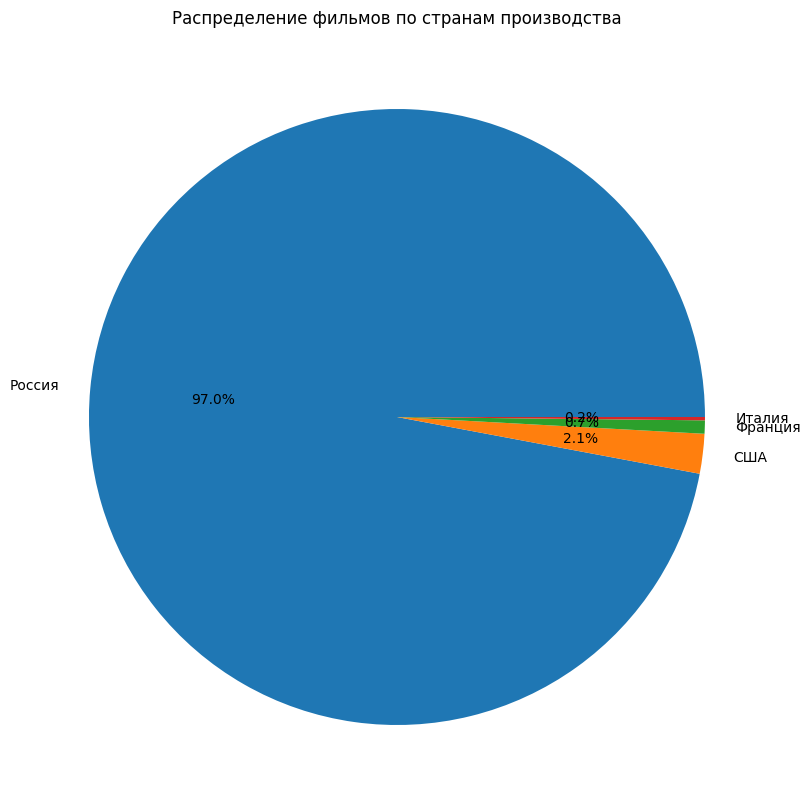

In [55]:
country_stats = df1['countryOfProduction'].value_counts()
country_stats.plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')
plt.title('Распределение фильмов по странам производства')
plt.ylabel('')
plt.show()

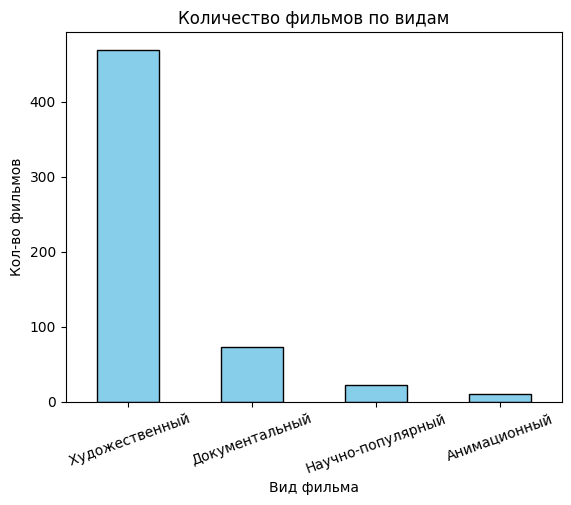

In [53]:
view_stats = df1['viewMovie'].value_counts()
view_stats.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Количество фильмов по видам')
plt.xlabel('Вид фильма')
plt.ylabel('Кол-во фильмов')
plt.xticks(rotation=20)
plt.show()

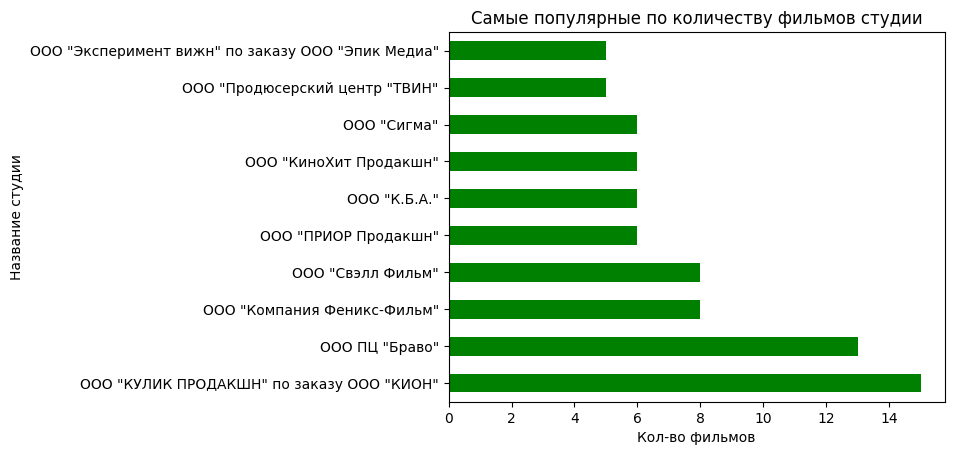

In [36]:
studio_stats = df1['studio'].value_counts().head(10)

studio_stats.plot(kind='barh', color='green')
plt.title('Самые популярные по количеству фильмов студии')
plt.xlabel('Кол-во фильмов')
plt.ylabel('Название студии')
plt.show()

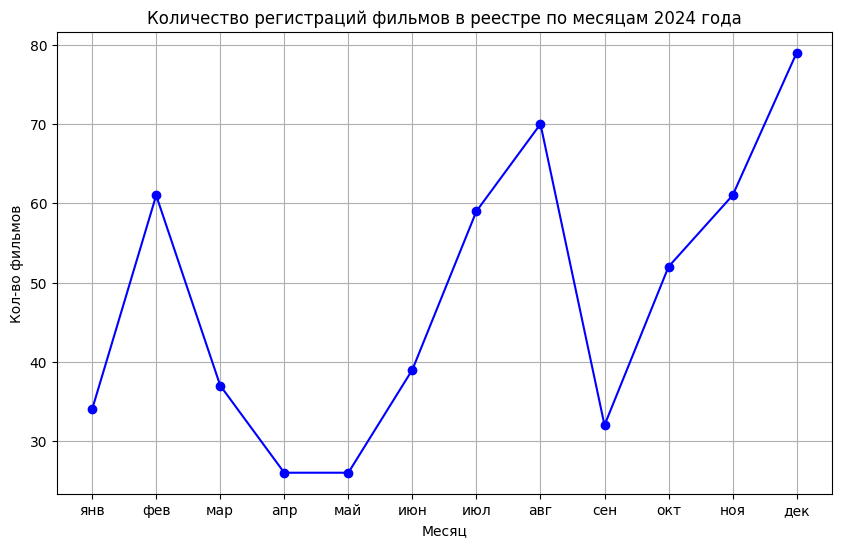

In [54]:
df1['month'] = df1['cardDate'].dt.month

monthly_count = df1.groupby('month').size()

monthly_count.plot(kind='line', marker='o', color='blue', figsize=(10, 6))
plt.title('Количество регистраций фильмов в реестре по месяцам 2024 года')
plt.xlabel('Месяц')
plt.ylabel('Кол-во фильмов')
plt.xticks(ticks=range(1, 13), labels=['янв', 'фев', 'мар', 'апр', 'май', 'июн', 'июл', 'авг', 'сен', 'окт', 'ноя', 'дек'])
plt.grid(True)
plt.show()

In [57]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 393.8 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.0 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 827.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Мне не понравилось среднее значение по длине фильмов, которое я получила в пункте 6, поэтому построим график с усами:

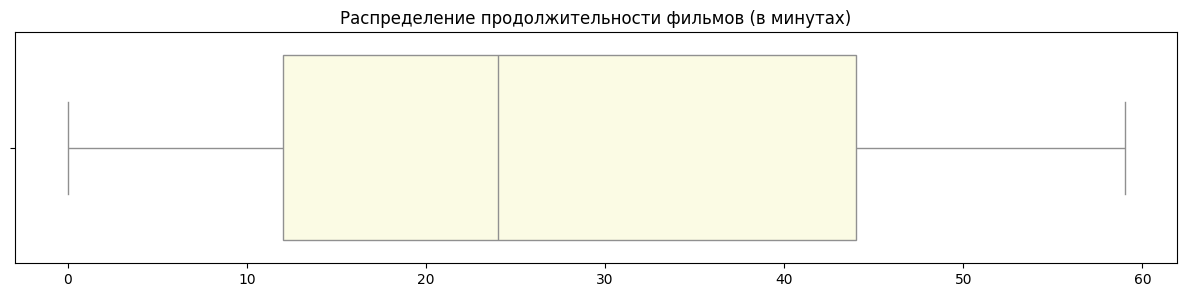

In [72]:
import seaborn as sns
plt.figure(figsize=(15, 3))
sns.boxplot(x=df1['durationMinute'], color='lightyellow')

plt.title('Распределение продолжительности фильмов (в минутах)')
plt.xlabel('')
plt.show()